# Graviational Field of an isolated planet

We model the planet as having uniform density $\rho$ and radius $R$, mass $M$. We furthermore denote the graviational potential as $\phi(r)$ depending on the euclidian distance $r$ of a given point $(x,y,z)$ in space from the center of the planet (the origin), i.e. $r_{xyz}$ = $\|(x,y,z)\|_{2}$. 


# Poission equation and conditions for gravitational potential $\phi$

The gravitational potential in and around the planet has to sasitfy the Poisson equation

  $\Delta \Large\phi$ =  $\begin{cases}
      \Large0, & \text{outside the planet} \\
      \Large4 \pi G \rho, & \text{inside the planet}
    \end{cases}$

where G is the gravitaional constant. We have to impose the conditions that $\phi$ does not have a singularity at $r=0$ and that $\lim_{r \rightarrow \infty} = 0$, as well as continuous differentiability at r=R (i.e. at the surface of the planet):

$\begin{equation}
\Large{\phi_{in}(R) = \phi_{out}(R)} \quad \text{and} \quad \Large{\frac{d\phi_{in}}{dr}\Bigg|_{r=R} = \frac{d\phi_{out}}{dr}\Bigg|_{r=R}}
\end{equation}$

## Analytical Solution
Under these conditions, the solution to the Poission equation above is

$\phi(r)$=  $\begin{cases}
    \Large-GM(\frac{3R^{2}-r^{2}}{2R^{3}}), & r \leq R \\
    \Large-GM/r, & r > R
\end{cases}$

Source: [Katz (2012) (University of Oxford)](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://foalab.earth.ox.ac.uk/files/EarthProfileLecture.pdf&ved=2ahUKEwio7Kj85-SFAxWTYPEDHWf5CPQQFnoECB8QAQ&usg=AOvVaw2EKyJuaR4xjiw_AaSeo-zZ)

In the following, we evaluate the solution at points randomly drawn within and around the planet at distnaces up to 2-3 times the planet's radius. As example we take the planet earth. At this scale, planet earth is virtually isolated, as the distance of moon and earth averages around 60 earth radii.

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy as sc

np.random.seed(19680801)
scale = 1000000 # scaling of the model
n = 500 # number of points at which the gravity is "sampled"

G = sc.constants.gravitational_constant/scale # gravitational constant
M = 5.9722*(10**24)/scale # earth's mass
R = 6.357*(10**6)/scale # mean earth radius

print("Gravitational Constant G: ", G, " Earth's mass M: ", M, " Earth's radius R: ", R, " (scale: 1:1000000)")

edge = R*2 # the edge of the graph will be two times the radius of the earth

# implement the solution to the poisson equation for gravitational potential as a function of the euclidian distance to the origin
def phi(r,G,M,R):
    if r <= R:
        phi = -G*M*((3*R**2-r**2)/(2*R**3))
    else:
        phi = -G*M/r
    return phi

 # check that graviational potential on earth's surface (i.e. when r = R) is approximately 60 MJ/kg 
print("\n", "Approximate gravitaional potential at earth's surface: ", np.abs(phi(R,G,M,R)), "MJ/kg")

# the function randrange randomly draws numbers form a uniform distribution between vmin and vmax
def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

# randomly draw coordinates with cube, with each component at most two times further away from the origin than earth's surface 
xs = randrange(n, -edge, edge)
ys = randrange(n, -edge, edge)
zs = randrange(n, -edge, edge)

cord = np.row_stack([xs,ys,zs]) # put together coordinates of sampling points
norm = np.linalg.norm(cord, axis=0) # save the euclidian norm of the coordinates (distance from origin (0,0,0) at earth's center)

# apply phi to the norm of each sampling point
phis = np.array([phi(x,G,M,R) for x in norm])

Gravitational Constant G:  6.674299999999999e-17  Earth's mass M:  5.9722e+18  Earth's radius R:  6.357  (scale: 1:1000000)

 Approximate gravitaional potential at earth's surface:  62.70293292433537 MJ/kg


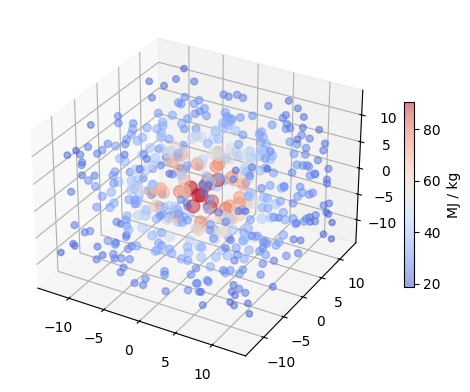

In [4]:
#Creating the 3D-Plot 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

grav = ax.scatter(xs, ys, zs, s=np.abs(phis),  marker='o', alpha= 0.5, c = np.abs(phis), cmap = cm.coolwarm)

fig.colorbar(grav, shrink=0.5, label='MJ / kg')
plt.show()

As expected, the 3D-Plot above shows that the gravitational potential is maximized at earth's center (the origin) and that is decreases with increasing distance of the evaluation points from the origin. Furthermore, it appears that the potential is close to 60 MJ/kg in proximity to earth's surface, where the red color of the balls switches into blue color.